In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy

In [ ]:
train = pd.read_csv('D:\\下载\\train.csv')
predict = pd.read_csv('D:\\下载\\test.csv')

In [ ]:
train_copy1 = copy.deepcopy(train)
predict_copy1 = copy.deepcopy(predict)

In [ ]:
train_copy1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
predict_copy1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [ ]:
train_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
predict_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train_copy1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
predict_copy1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_copy1['Gender'].fillna(train_copy1['Gender'].mode()[0], inplace=True)
train_copy1['Married'].fillna(train_copy1['Married'].mode()[0], inplace=True)
train_copy1['Dependents'].fillna(train_copy1['Dependents'].mode()[0], inplace=True)
train_copy1['Self_Employed'].fillna(train_copy1['Self_Employed'].mode()[0], inplace=True)
train_copy1['LoanAmount'].fillna(train_copy1['LoanAmount'].median(), inplace=True)
train_copy1['Loan_Amount_Term'].fillna(train_copy1['Loan_Amount_Term'].mode()[0], inplace=True)
train_copy1['Credit_History'].fillna(train_copy1['Credit_History'].mode()[0], inplace=True)

In [ ]:
label_encoder = LabelEncoder()
train_copy1['Gender'] = label_encoder.fit_transform(train_copy1['Gender'])
train_copy1['Married'] = label_encoder.fit_transform(train_copy1['Married'])
train_copy1['Dependents'] = label_encoder.fit_transform(train_copy1['Dependents'])
train_copy1['Education'] = label_encoder.fit_transform(train_copy1['Education'])
train_copy1['Self_Employed'] = label_encoder.fit_transform(train_copy1['Self_Employed'])
train_copy1['Property_Area'] = label_encoder.fit_transform(train_copy1['Property_Area'])
train_copy1['Loan_Status'] = label_encoder.fit_transform(train_copy1['Loan_Status'])

In [ ]:
X = train_copy1.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_copy1['Loan_Status']

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
X_imputed = knn_imputer.fit_transform(X)

In [ ]:
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
final_df = pd.concat([X_imputed_df, y], axis=1)

In [ ]:
train_copy1 = final_df

In [ ]:
train_copy1.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        0.0            0.0           5849.0   
1     1.0      1.0         1.0        0.0            0.0           4583.0   
2     1.0      1.0         0.0        0.0            1.0           3000.0   
3     1.0      1.0         0.0        1.0            0.0           2583.0   
4     1.0      0.0         0.0        0.0            0.0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0            2.0            1  
1            0.0            0  
2            2.0            1  
3            2.0            1  
4            2.0            1

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
reverse_mapping = {}
for column in categorical_columns:
    label_encoder.fit(train_copy1[column])
    reverse_mapping[column] = {label: category for label, category in zip(label_encoder.transform(train_copy1[column]), train_copy1[column])}

In [ ]:
for column in categorical_columns:
    final_df[column] = final_df[column].map(reverse_mapping[column])

In [ ]:
train_copy1 = final_df

In [ ]:
train_copy1.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        0.0            0.0           5849.0   
1     1.0      1.0         1.0        0.0            0.0           4583.0   
2     1.0      1.0         0.0        0.0            1.0           3000.0   
3     1.0      1.0         0.0        1.0            0.0           2583.0   
4     1.0      0.0         0.0        0.0            0.0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0            2.0            1  
1            0.0            0  
2            2.0            1  
3            2.0            1  
4            2.0            1

In [ ]:
predict_copy1['Gender'].fillna(predict_copy1['Gender'].mode()[0], inplace=True)
predict_copy1['Dependents'].fillna(predict_copy1['Dependents'].mode()[0], inplace=True)
predict_copy1['Self_Employed'].fillna(predict_copy1['Self_Employed'].mode()[0], inplace=True)
predict_copy1['LoanAmount'].fillna(predict_copy1['LoanAmount'].median(), inplace=True)
predict_copy1['Loan_Amount_Term'].fillna(predict_copy1['Loan_Amount_Term'].mode()[0], inplace=True)
predict_copy1['Credit_History'].fillna(predict_copy1['Credit_History'].mode()[0], inplace=True)

In [ ]:
label_encoder = LabelEncoder()
predict_copy1['Gender'] = label_encoder.fit_transform(predict_copy1['Gender'])
predict_copy1['Married'] = label_encoder.fit_transform(predict_copy1['Married'])
predict_copy1['Dependents'] = label_encoder.fit_transform(predict_copy1['Dependents'])
predict_copy1['Education'] = label_encoder.fit_transform(predict_copy1['Education'])
predict_copy1['Self_Employed'] = label_encoder.fit_transform(predict_copy1['Self_Employed'])
predict_copy1['Property_Area'] = label_encoder.fit_transform(predict_copy1['Property_Area'])

In [ ]:
X_predict = predict_copy1.drop('Loan_ID', axis=1)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
X_predict_imputed = knn_imputer.fit_transform(X_predict)

In [ ]:
X_predict_imputed_df = pd.DataFrame(X_predict_imputed, columns=X_predict.columns)

In [ ]:
predict_copy1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
train_copy2 = copy.deepcopy(train)
predict_copy2 = copy.deepcopy(predict)

In [ ]:
train_copy2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
predict_copy2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_copy2['Gender'].fillna(train_copy2['Gender'].mode()[0], inplace=True)
train_copy2['Married'].fillna(train_copy2['Married'].mode()[0], inplace=True)
train_copy2['Dependents'].fillna(train_copy2['Dependents'].mode()[0], inplace=True)
train_copy2['Self_Employed'].fillna(train_copy2['Self_Employed'].mode()[0], inplace=True)
train_copy2['LoanAmount'].fillna(train_copy2['LoanAmount'].median(), inplace=True)
train_copy2['Loan_Amount_Term'].fillna(train_copy2['Loan_Amount_Term'].mode()[0], inplace=True)
train_copy2['Credit_History'].fillna(train_copy2['Credit_History'].mode()[0], inplace=True)

In [ ]:
label_encoder = LabelEncoder()
train_copy2['Gender'] = label_encoder.fit_transform(train_copy2['Gender'])
train_copy2['Married'] = label_encoder.fit_transform(train_copy2['Married'])
train_copy2['Dependents'] = label_encoder.fit_transform(train_copy2['Dependents'])
train_copy2['Education'] = label_encoder.fit_transform(train_copy2['Education'])
train_copy2['Self_Employed'] = label_encoder.fit_transform(train_copy2['Self_Employed'])
train_copy2['Property_Area'] = label_encoder.fit_transform(train_copy2['Property_Area'])
train_copy2['Loan_Status'] = label_encoder.fit_transform(train_copy2['Loan_Status'])

In [ ]:
X = train_copy2.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_copy2['Loan_Status']

In [ ]:
regression_model = LinearRegression()

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_imputed = imputer.fit_transform(X)

In [ ]:
regression_model.fit(X_imputed, y)

LinearRegression()

In [ ]:
X_missing = X[X.isnull().any(axis=1)]  # Rows with missing values
X_missing_imputed = imputer.transform(X_missing)
missing_predictions = regression_model.predict(X_missing_imputed)

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by SimpleImputer.

In [ ]:
train_copy2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
predict_copy2['Gender'].fillna(predict_copy2['Gender'].mode()[0], inplace=True)
predict_copy2['Dependents'].fillna(predict_copy2['Dependents'].mode()[0], inplace=True)
predict_copy2['Self_Employed'].fillna(predict_copy2['Self_Employed'].mode()[0], inplace=True)
predict_copy2['LoanAmount'].fillna(predict_copy2['LoanAmount'].median(), inplace=True)
predict_copy2['Loan_Amount_Term'].fillna(predict_copy2['Loan_Amount_Term'].mode()[0], inplace=True)
predict_copy2['Credit_History'].fillna(predict_copy2['Credit_History'].mode()[0], inplace=True)

In [ ]:
label_encoder = LabelEncoder()
predict_copy2['Gender'] = label_encoder.fit_transform(predict_copy2['Gender'])
predict_copy2['Married'] = label_encoder.fit_transform(predict_copy2['Married'])
predict_copy2['Dependents'] = label_encoder.fit_transform(predict_copy2['Dependents'])
predict_copy2['Education'] = label_encoder.fit_transform(predict_copy2['Education'])
predict_copy2['Self_Employed'] = label_encoder.fit_transform(predict_copy2['Self_Employed'])
predict_copy2['Property_Area'] = label_encoder.fit_transform(predict_copy2['Property_Area'])

In [ ]:
X_predict = predict_copy2.drop('Loan_ID', axis=1)

In [ ]:
if X_predict.isnull().any().any():

    regression_model = LinearRegression()

    imputer = SimpleImputer(strategy='mean')

    X_predict_imputed = imputer.fit_transform(X_predict)

    regression_model.fit(X_predict_imputed, y)

    X_missing = X_predict[X_predict.isnull().any(axis=1)]

    if not X_missing.empty:

        X_missing_imputed = imputer.transform(X_missing)
        missing_predictions = regression_model.predict(X_missing_imputed)

        predict_copy2.loc[X_missing.index, X_missing.columns] = missing_predictions

In [ ]:
predict_copy2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

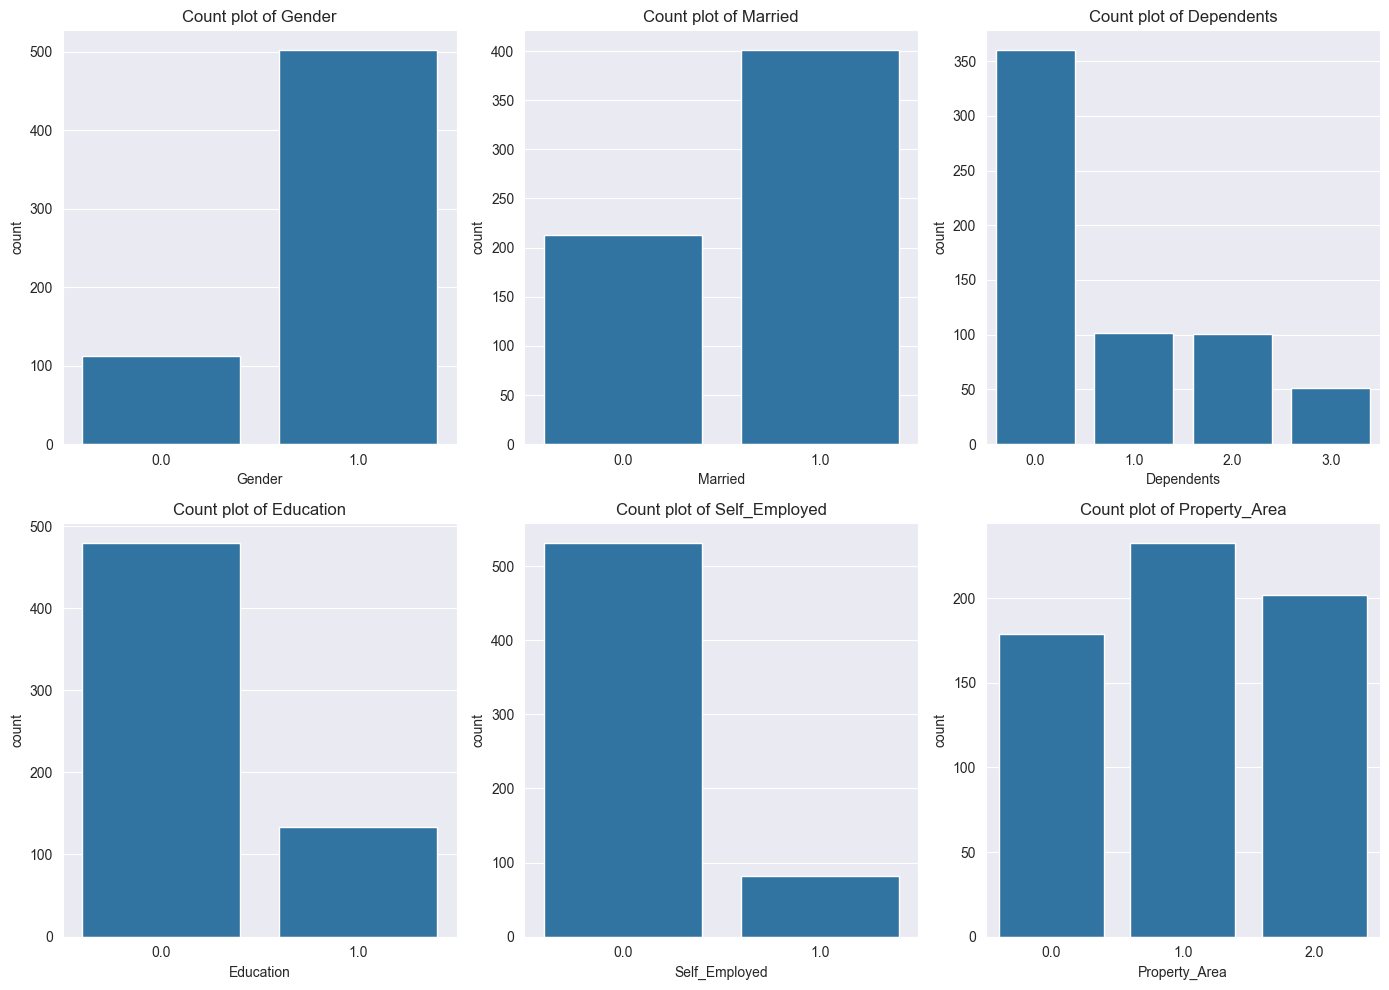

In [ ]:
plt.figure(figsize=(14, 10))
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=train_copy1)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

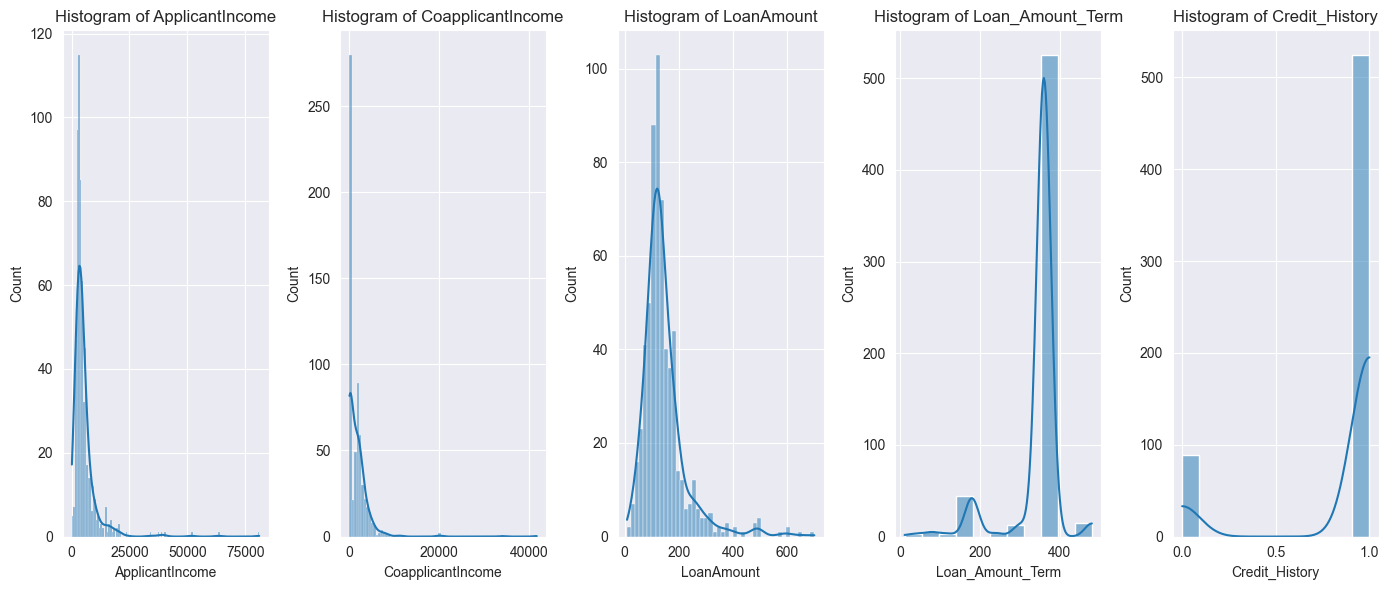

In [ ]:
plt.figure(figsize=(14, 6))
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 5, i)
    sns.histplot(train_copy1[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

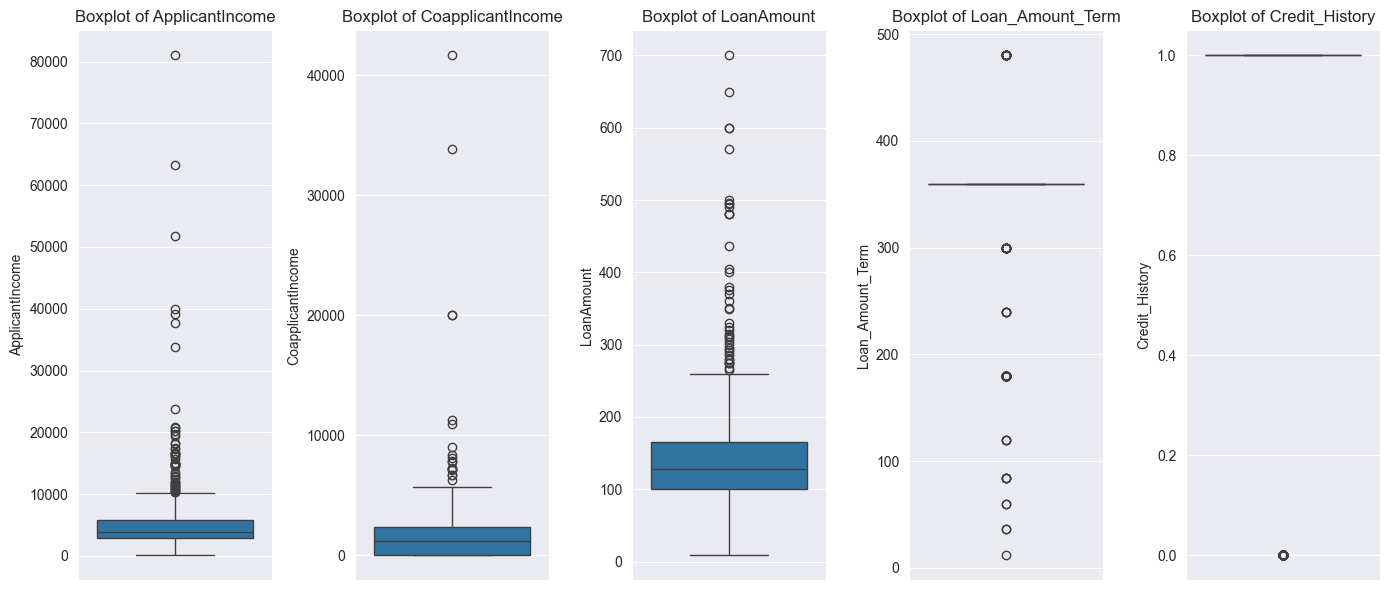

In [ ]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=col, data=train_copy1)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

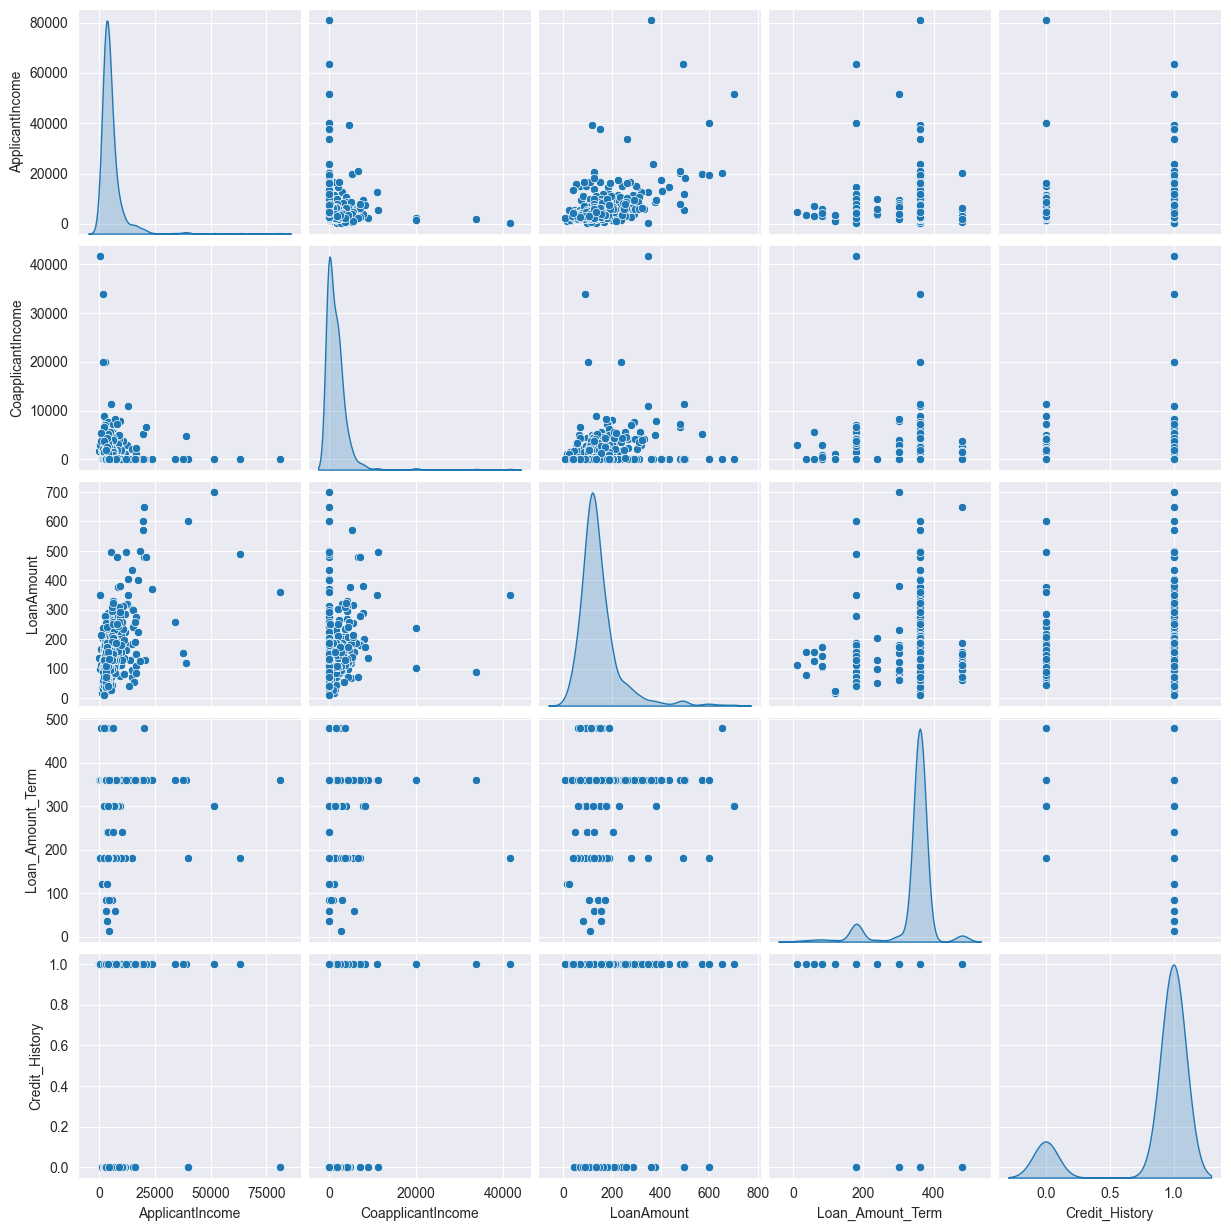

In [ ]:
sns.pairplot(train_copy1[numerical_cols], diag_kind='kde')
plt.show()

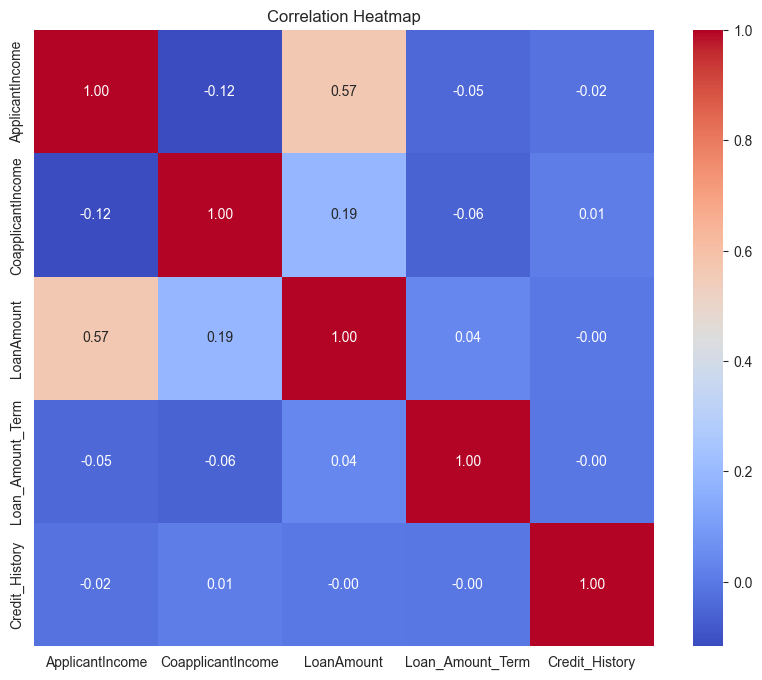

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_copy1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Gender', ylabel='LoanAmount'>

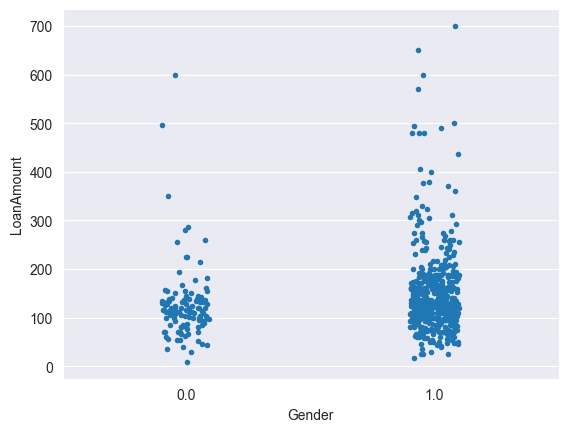

In [ ]:
sns.stripplot(x='Gender', y='LoanAmount', hue=None, data=train_copy1, jitter=True,
              color=None, size=4,
              edgecolor="auto", linewidth=0)

D:\anaconda3\envs\DataAnalytics\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


D:\anaconda3\envs\DataAnalytics\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


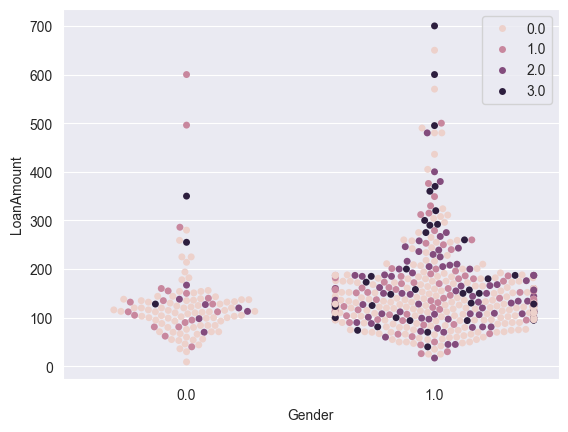

In [ ]:
sns.swarmplot(x='Gender', y='LoanAmount', hue='Dependents', data=train_copy1)
plt.legend(loc = 'best')

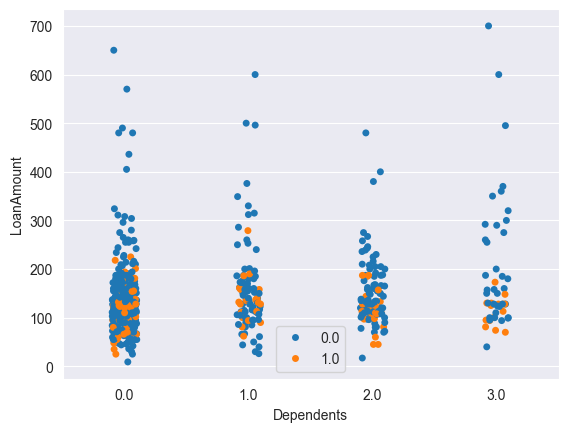

In [ ]:
sns.stripplot(x='Dependents', y='LoanAmount', hue='Education', data=train_copy1,
              color=None, palette=None, size=5,
              edgecolor="auto", linewidth=0,
              ax=None)
plt.legend(loc='best')

In [ ]:
predict_copy1.drop(columns='Loan_ID', inplace=True)
predict_copy1.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0             5720   
1       1        1           1          0              0             3076   
2       1        1           2          0              0             5000   
3       1        1           2          0              0             2340   
4       1        0           0          1              0             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             1.0   
4                  0        78.0             360.0             1.0   

   Property_Area  
0              2  
1              2  
2              2  
3              2  
4              2

In [ ]:
#Logistic Regression,knn,Random Forest,Decision Trees,Xgboost,Neural Networks, Gbm-lightGbm, SVM
#Logistic
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = train_copy1.drop('Loan_Status', axis=1)
y = train_copy1['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Optimization algorithm
}

In [ ]:
model = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, solver='liblinear')

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


In [ ]:
#KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [ ]:
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7804878048780488


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [ ]:
y_pred = best_dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7398373983739838


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        43
           1       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'n_estimators': [100, 200, 300]  # Number of trees
}

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_xgb = XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
best_xgb.fit(X_train, y_train)

In [ ]:
y_pred = best_xgb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
13/13 [==============================] - 1s 12ms/step - loss: 0.7872 - accuracy: 0.3061 - val_loss: 0.7193 - val_accuracy: 0.3737
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6122 - val_loss: 0.6512 - val_accuracy: 0.7071
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.7832 - val_loss: 0.6096 - val_accuracy: 0.7576
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.8036 - val_loss: 0.5785 - val_accuracy: 0.7778
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.8087 - val_loss: 0.5538 - val_accuracy: 0.7879
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.8163 - val_loss: 0.5381 - val_accuracy: 0.7879
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8189 - val_loss: 0.5223 - val_accuracy: 0.7980
Epoch 8/50
13/13 [=

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        43
           1       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123


In [ ]:
!pip install lightgbm

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'num_leaves': [15, 31, 63],  # Maximum number of leaves in one tree
    'n_estimators': [100, 200, 300]  # Number of boosted trees to fit
}

In [ ]:
import lightgbm as lgb

In [ ]:
gbm = lgb.LGBMClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696429 -> initscore=0.830348
[LightGBM] [Info] Start training from score 0.830348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_gbm = lgb.LGBMClassifier(**best_params)
best_gbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.05, max_depth=3, num_leaves=15)

In [ ]:
y_pred = best_gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123


In [ ]:
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
svm = SVC()

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_svm = SVC(**best_params)
best_svm.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred = best_svm.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


In [ ]:
X_predict = predict_copy1

In [ ]:
scaler = StandardScaler()
X_predict_scaled = scaler.fit_transform(X_predict)

In [ ]:
loan_status_predicted = best_svm.predict(X_predict_scaled)

In [ ]:
predict_copy1['Loan_Status'] = loan_status_predicted

In [ ]:
predict_copy1.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0             5720   
1       1        1           1          0              0             3076   
2       1        1           2          0              0             5000   
3       1        1           2          0              0             2340   
4       1        0           0          1              0             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             1.0   
4                  0        78.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              2            1  
2              2            1  
3              2            1  
4              2            1

In [ ]:
X = train_copy1.drop('Loan_Status', axis=1)
y = train_copy1['Loan_Status']

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
feature_importances = rf.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

Feature  Importance
9      Credit_History    0.265926
5     ApplicantIncome    0.214366
7          LoanAmount    0.184127
6   CoapplicantIncome    0.115308
2          Dependents    0.047024
10      Property_Area    0.046021
8    Loan_Amount_Term    0.042830
1             Married    0.024305
3           Education    0.022283
4       Self_Employed    0.018926
0              Gender    0.018884